In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

import warnings;
warnings.filterwarnings('ignore');

In [3]:
titanic=pd.read_csv('titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic['Fare'].sort_values(ascending=False)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: Fare, Length: 891, dtype: float64

<AxesSubplot:>

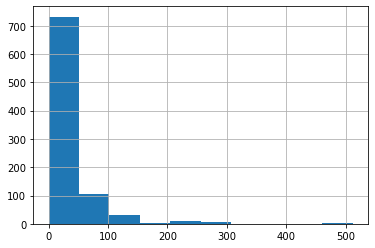

In [6]:
titanic['Fare'].hist()

<AxesSubplot:xlabel='Fare'>

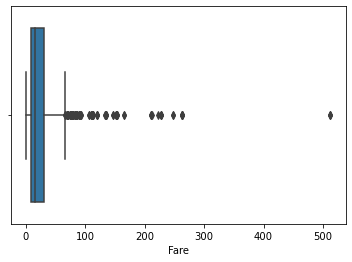

In [7]:
sns.boxplot(x='Fare',data=titanic)

In [8]:
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
titanic['Fare1']=np.where(titanic['Fare']>upper_whisker,upper_whisker,np.where(titanic['Fare']<lower_whisker,lower_whisker,titanic['Fare']))
#print(boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))
#boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [9]:
print(titanic.shape)
print(titanic['Fare1'].shape)

(891, 13)
(891,)


In [10]:
titanic['Fare1'].sort_values(ascending=True).head(30)

271    0.0000
597    0.0000
302    0.0000
633    0.0000
277    0.0000
413    0.0000
674    0.0000
263    0.0000
466    0.0000
732    0.0000
179    0.0000
806    0.0000
481    0.0000
822    0.0000
815    0.0000
378    4.0125
872    5.0000
326    6.2375
843    6.4375
818    6.4500
371    6.4958
202    6.4958
654    6.7500
143    6.7500
411    6.8583
825    6.9500
129    6.9750
804    6.9750
477    7.0458
611    7.0500
Name: Fare1, dtype: float64

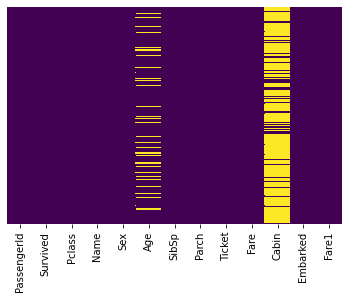

In [11]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [12]:
titanic.isnull().sum()/len(titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Fare1           0.000000
dtype: float64

<AxesSubplot:>

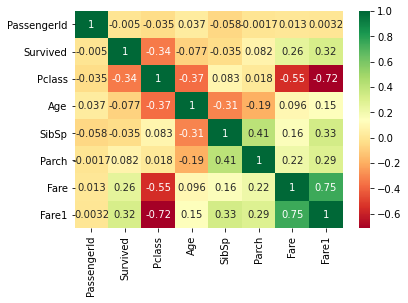

In [13]:
sns.heatmap(titanic.corr(), annot = True, cmap = 'RdYlGn')

<AxesSubplot:xlabel='Survived', ylabel='count'>

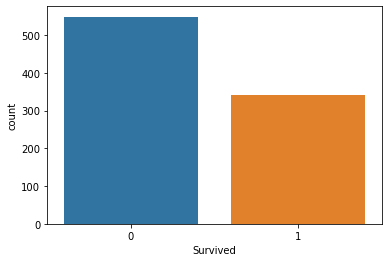

In [14]:
sns.countplot(x='Survived',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

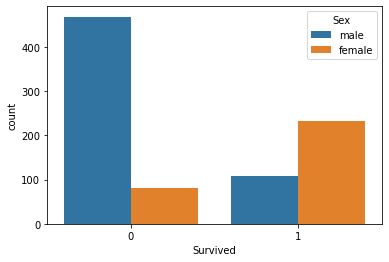

In [15]:
sns.countplot(x='Survived',data=titanic,hue='Sex')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

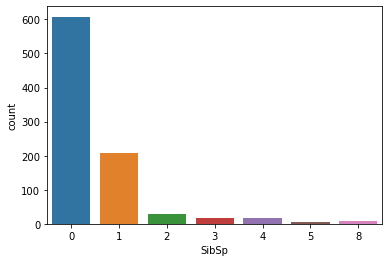

In [16]:
sns.countplot(x='SibSp',data=titanic)

<AxesSubplot:xlabel='Age'>

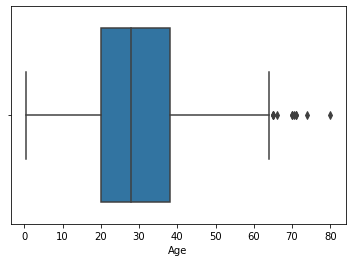

In [17]:
sns.boxplot(x='Age',data=titanic)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

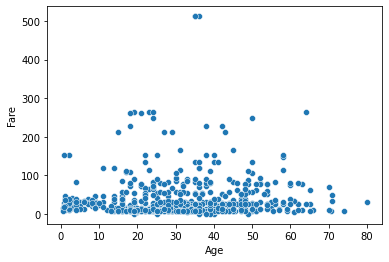

In [18]:
sns.scatterplot(x='Age', y='Fare', data=titanic)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

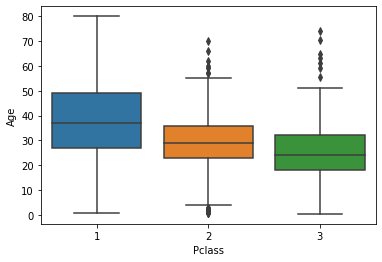

In [19]:
sns.boxplot(y='Age',x='Pclass',data=titanic)

In [7]:

# print(np.nanmean(titanic['Age']))
# titanic['mean_Age']=np.nanmean(titanic['Age'])
#Imputing median for missing values in column A and creating a new column for it

titanic['Age_median'] = titanic['Age'].fillna(titanic['Age'].median())


In [8]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_median   891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_median       0
dtype: int64

In [11]:
titanic.drop(['Age'], axis = 1, inplace = True) 

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Age_median   891 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
titanic['Embarked'].mode()[0]

'S'

In [15]:
titanic[titanic['Embarked'].isnull()]['Embarked']=titanic['Embarked'].mode()[0]

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Age_median   891 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [31]:
titanic[titanic['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare1,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,7.2500,22.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250,26.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,8.0500,35.0
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,8.4583,28.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,NaN,S,21.0750,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,0,0,SOTON/OQ 392076,7.0500,NaN,S,7.0500,25.0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,0,5,382652,29.1250,NaN,Q,29.1250,39.0
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,13.0000,27.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,23.4500,28.0


In [18]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [19]:
titanic['Cabin'].iloc[1][0]

'C'

In [20]:
titanic['Cabin_new']=titanic['Cabin'].apply(lambda x:str(x)[0].upper() if x else None)

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Cabin_new
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0,C
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0,N


In [22]:
titanic['Cabin_new'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [23]:
titanic[titanic['Cabin_new']=='N']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Cabin_new
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0,N
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,N
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0,N
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,28.0,N
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,NaN,S,2.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,0,0,SOTON/OQ 392076,7.0500,NaN,S,25.0,N
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,0,5,382652,29.1250,NaN,Q,39.0,N
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.0,N
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,28.0,N


In [25]:
titanic['Cabin_new']=titanic['Cabin_new'].replace('N','missing')

In [26]:
titanic['Cabin_new'].unique()

array(['missing', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<AxesSubplot:xlabel='Cabin_new', ylabel='count'>

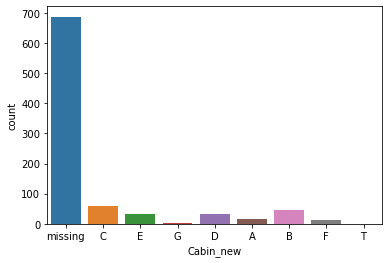

In [27]:

sns.countplot(x='Cabin_new', data=titanic)

<AxesSubplot:xlabel='Cabin_new', ylabel='Survived'>

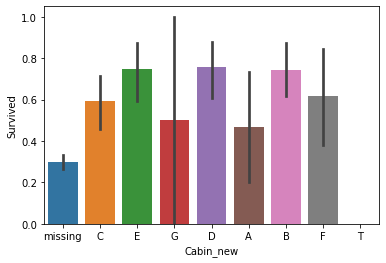

In [28]:
sns.barplot(y='Survived',x='Cabin_new',data=titanic)

In [29]:
titanic.drop(['Fare','Cabin','PassengerId','Name'], axis=1, inplace=True)


In [30]:
titanic.drop(['Ticket'],axis=1,inplace=True)

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Embarked    889 non-null    object 
 6   Age_median  891 non-null    float64
 7   Cabin_new   891 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [32]:
#categorical
titanic=pd.get_dummies(titanic,columns=['Sex','Embarked','Cabin_new'])

In [33]:
titanic.head()

,Survived,Pclass,SibSp,Parch,Age_median,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_new_A,Cabin_new_B,Cabin_new_C,Cabin_new_D,Cabin_new_E,Cabin_new_F,Cabin_new_G,Cabin_new_T,Cabin_new_missing
0,0,3,1,0,22.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,1,0,38.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,3,0,0,26.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,1,0,35.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,3,0,0,35.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [34]:
X = titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [36]:
#Feature scaling
#Scaling the independent variables

#standard_Scaler=StandardScaler()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features

array([[ 0.82737724,  0.43279337, -0.47367361, ..., -0.06715343,
        -0.03352008,  0.54492498],
       [-1.56610693,  0.43279337, -0.47367361, ..., -0.06715343,
        -0.03352008, -1.835115  ],
       [ 0.82737724, -0.4745452 , -0.47367361, ..., -0.06715343,
        -0.03352008,  0.54492498],
       ...,
       [ 0.82737724,  0.43279337,  2.00893337, ..., -0.06715343,
        -0.03352008,  0.54492498],
       [-1.56610693, -0.4745452 , -0.47367361, ..., -0.06715343,
        -0.03352008, -1.835115  ],
       [ 0.82737724, -0.4745452 , -0.47367361, ..., -0.06715343,
        -0.03352008,  0.54492498]])

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [41]:
X_train.shape

(594, 18)

In [42]:
X_test.shape

(297, 18)

In [43]:
y_test.shape


(297,)

In [44]:
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [142]:
y_pred=log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int6

In [143]:
y_test

837    0
334    1
849    1
778    0
413    0
      ..
299    1
801    1
392    0
22     1
137    0
Name: Survived, Length: 297, dtype: int64

In [144]:
difference = pd.DataFrame(y_test - y_pred)
difference.value_counts()

Survived
 0          236
 1           36
-1           25
dtype: int64

In [145]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix 

array([[148,  25],
       [ 36,  88]], dtype=int64)

<AxesSubplot:>

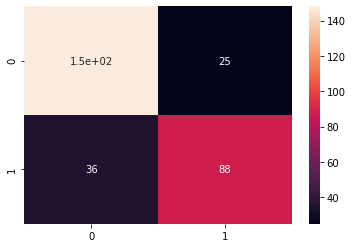

In [146]:
sns.heatmap(conf_matrix, annot = True)

In [59]:
#TP=89, 89 people actually survived which is predicted correct by the model, 
#TN=149 people didnt survive which is also predicted corrrectly by the model.
#FN=35 actally survived but they were predicted wrong by the model.
#FP=24 actually didnt survive but were predicted wrong by the model.

In [60]:
###Matching the calclations ###
#Accuracy=(TP + TN )/ Total=(89+149)/297=80%
#Precision=(TP / Total predicted positive)=89/113=78.7%
#Recall=(TP / Total actual positves)=89/124=71.7

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       173
           1       0.78      0.71      0.74       124

    accuracy                           0.79       297
   macro avg       0.79      0.78      0.79       297
weighted avg       0.79      0.79      0.79       297



In [149]:
y_pred_proba = log_reg.predict_proba(X_test)
print(y_pred_proba, y_pred_proba[::,1])

[[0.89771805 0.10228195]
 [0.11474217 0.88525783]
 [0.07903213 0.92096787]
 [0.86627575 0.13372425]
 [0.83268404 0.16731596]
 [0.08576777 0.91423223]
 [0.81289209 0.18710791]
 [0.83465976 0.16534024]
 [0.9165257  0.0834743 ]
 [0.7711245  0.2288755 ]
 [0.83808633 0.16191367]
 [0.09125901 0.90874099]
 [0.82478143 0.17521857]
 [0.52106019 0.47893981]
 [0.09401792 0.90598208]
 [0.67891794 0.32108206]
 [0.90786973 0.09213027]
 [0.85511784 0.14488216]
 [0.34224032 0.65775968]
 [0.53086571 0.46913429]
 [0.59181073 0.40818927]
 [0.22032894 0.77967106]
 [0.49694325 0.50305675]
 [0.86843874 0.13156126]
 [0.96298398 0.03701602]
 [0.55774122 0.44225878]
 [0.71757077 0.28242923]
 [0.88879571 0.11120429]
 [0.41583158 0.58416842]
 [0.45634659 0.54365341]
 [0.85904113 0.14095887]
 [0.08469421 0.91530579]
 [0.31370791 0.68629209]
 [0.34660774 0.65339226]
 [0.37391815 0.62608185]
 [0.86774723 0.13225277]
 [0.13615952 0.86384048]
 [0.85484031 0.14515969]
 [0.8675944  0.1324056 ]
 [0.48134053 0.51865947]


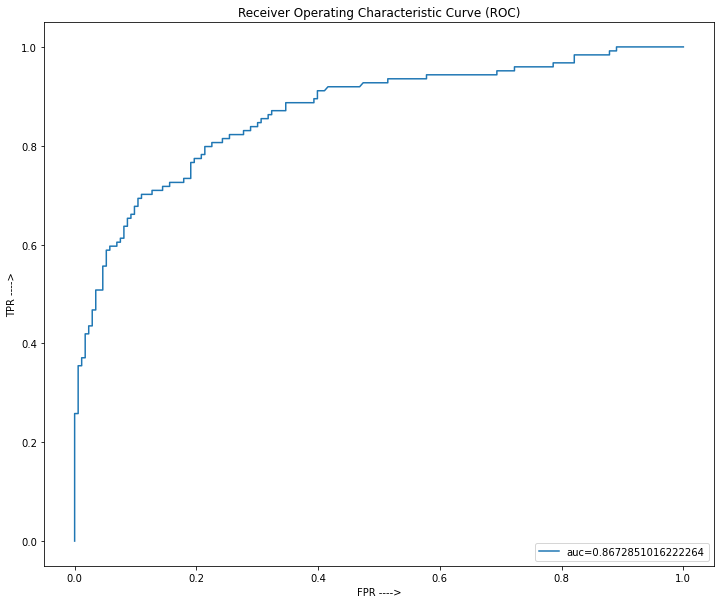

In [150]:
#Predict_proba returns the probability of 0 and 1, since we slice [::,1] this implies we only take the probability of 1
#

y_pred_proba = log_reg.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   

# metrics.roc_curve returns three outputs: fpr, tpr and different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

#metrics.roc_auc_score directly returns the auc for y_actual and corresponding prob values of success for each row
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotting the AUC curve
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [151]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)     #returns the single auc value
auc

0.8672851016222264

In [152]:
from sklearn.tree import DecisionTreeClassifier      #DecisionTreeClassifier & DecisionTreeRegressor

#Evaluation libraries
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import roc_curve, auc

In [153]:
###Decision Tree#####
# Instatiating the DecisionTreeClassifer model , with a fixed random state and max_depth

model=DecisionTreeClassifier(random_state=42,max_depth=5)    #constraint

In [154]:
# fit the DecisionTreeClassifeir model on the train dataset

dt=model.fit(X_train,y_train)

In [155]:
#Predict the output variable value for the X test dataset

y_pred=dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[::,1]  

In [157]:
###Evaluation of the model##
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7946127946127947


[[150  23]
 [ 38  86]]


<AxesSubplot:>

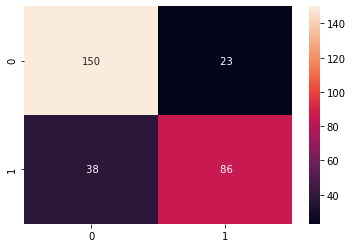

In [159]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True , fmt="3")

In [160]:
# classification: recall, precision, F1 score , Accuracy 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       173
           1       0.79      0.69      0.74       124

    accuracy                           0.79       297
   macro avg       0.79      0.78      0.78       297
weighted avg       0.79      0.79      0.79       297



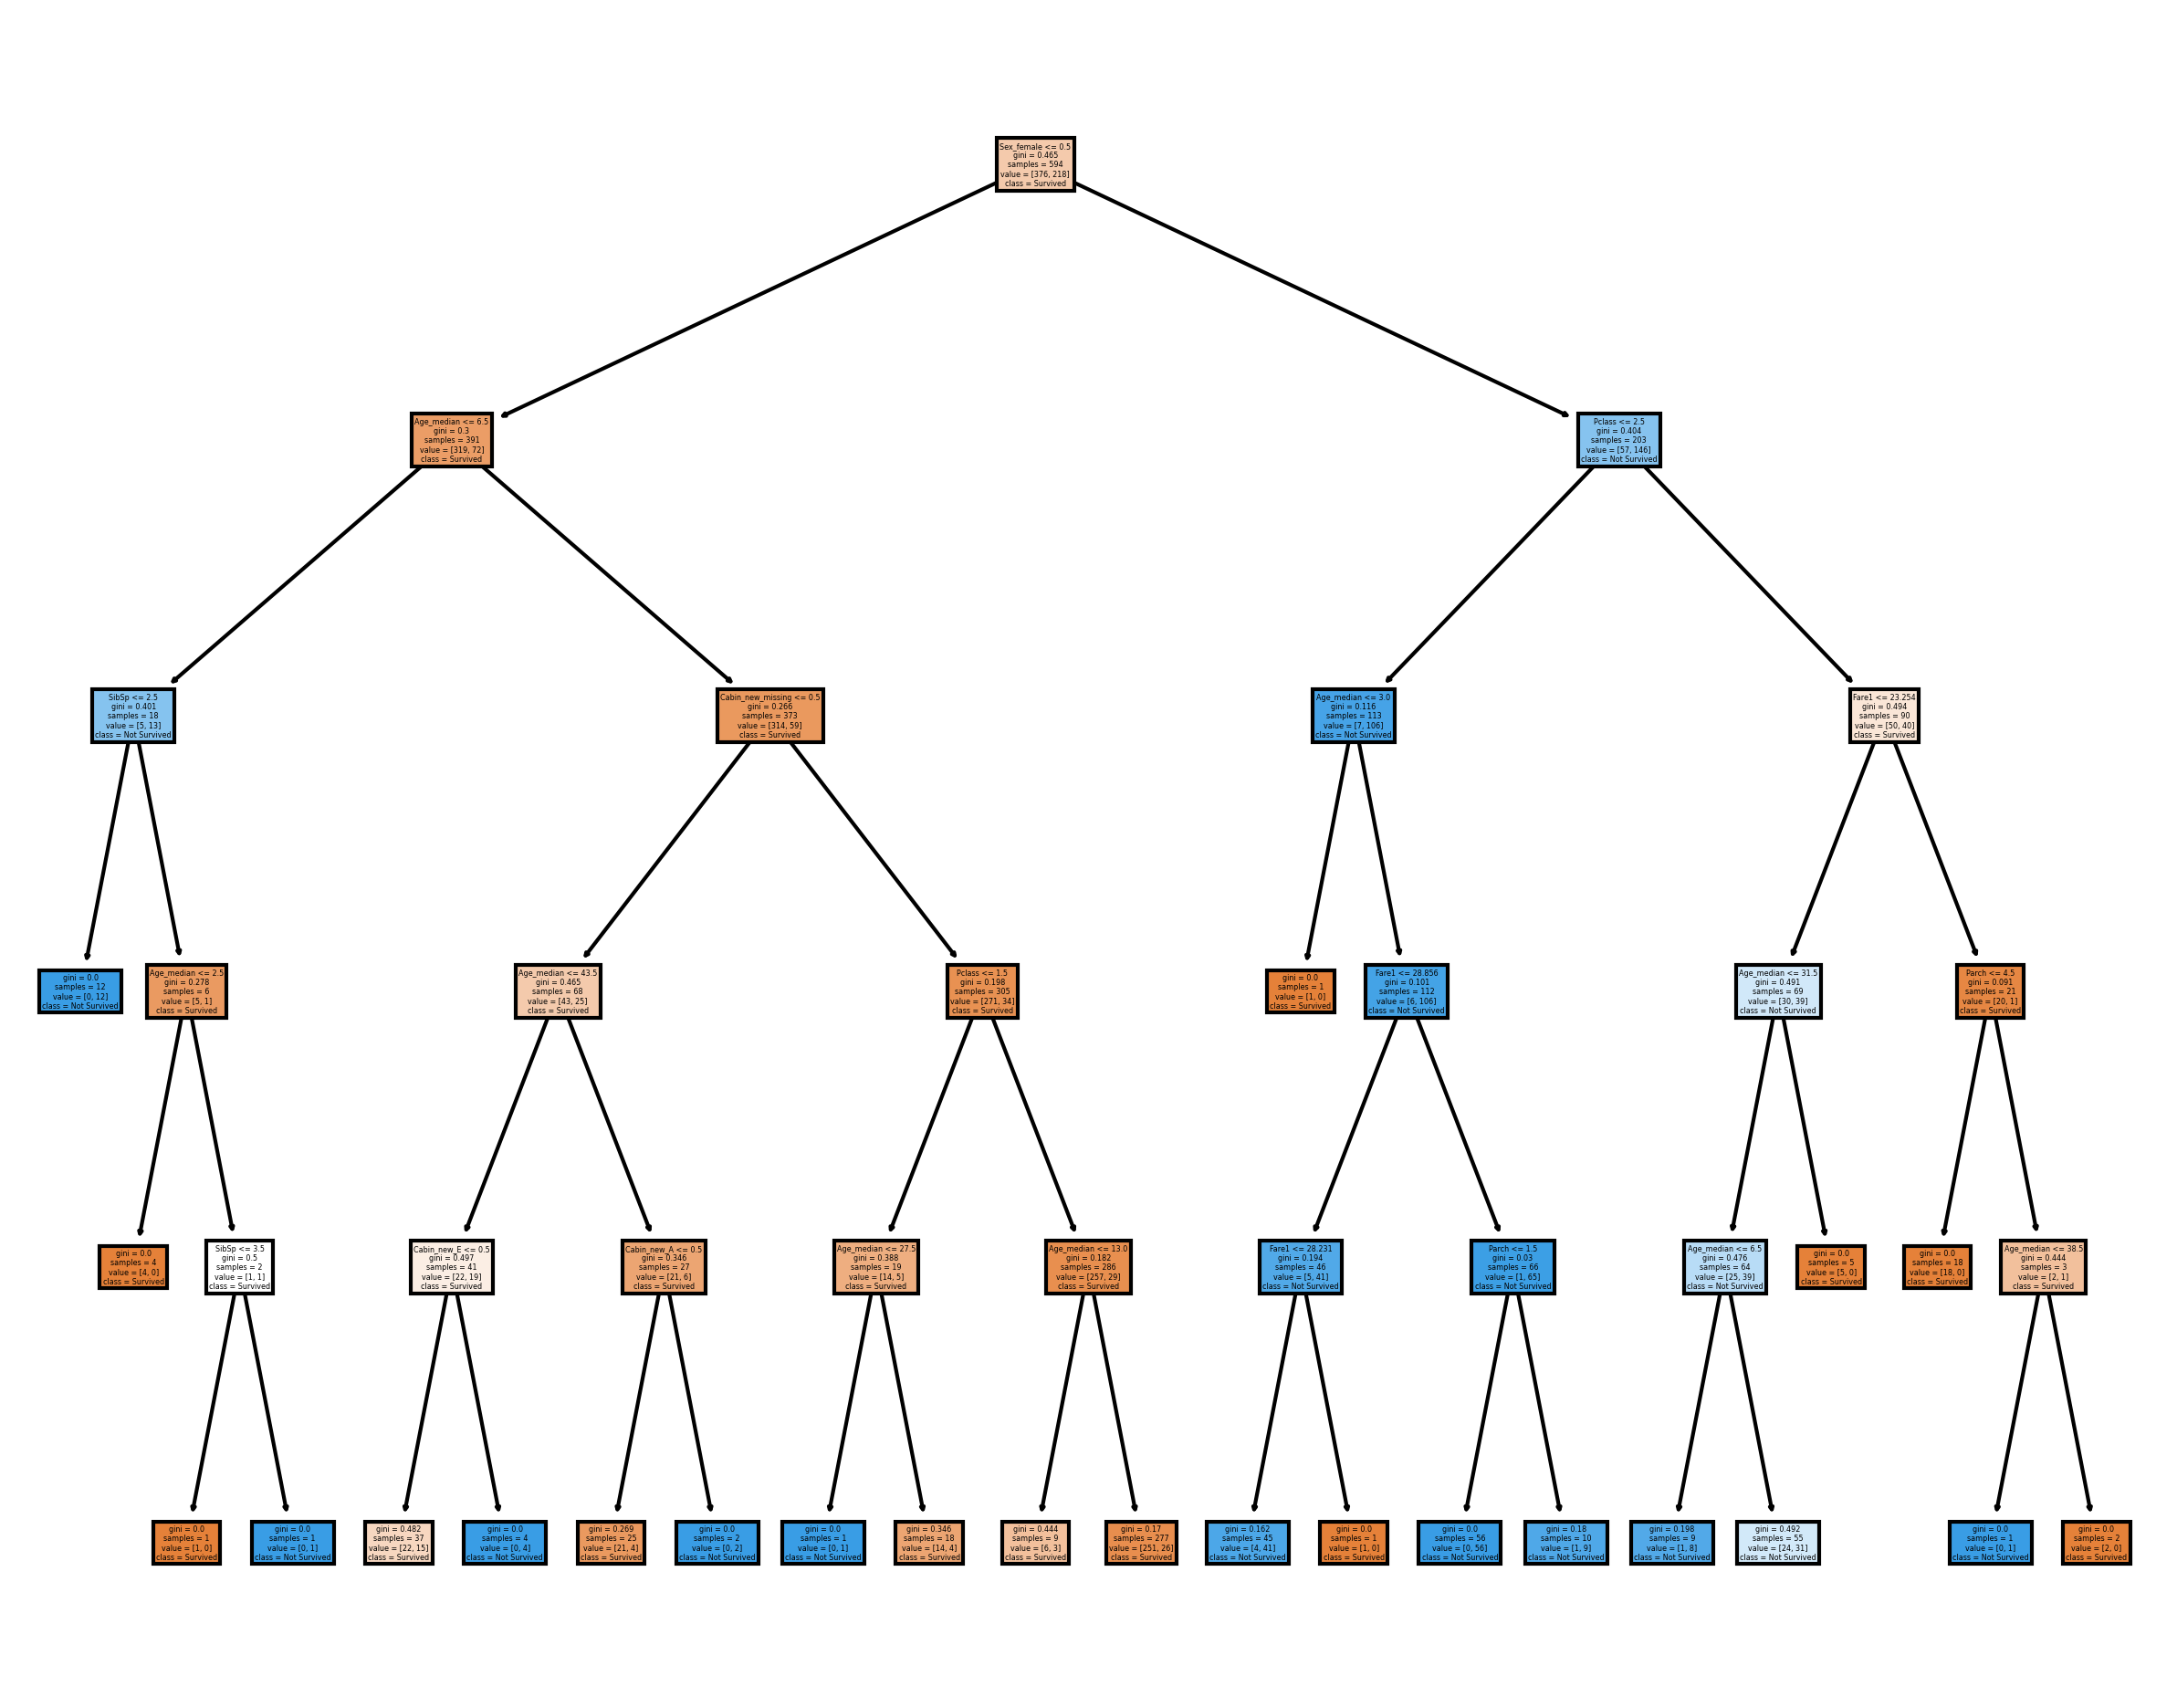

In [161]:
# Plotting the Decision Tree

from sklearn import tree
df1=pd.DataFrame(titanic.drop(['Survived'],axis=1))
column_names=list(df1.columns)
fn=column_names
cn=['Survived','Not Survived']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)

tree.plot_tree(model,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('DecisionTree.png')

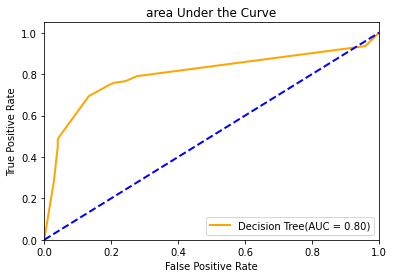

In [162]:
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [163]:
titanic.shape

(891, 20)

In [77]:
####max depth=4###

In [164]:
###Decision Tree#####
# Instatiating the DecisionTreeClassifer model , with a fixed random state and max_depth

model=DecisionTreeClassifier(random_state=35,max_depth=4)    #constraint

In [165]:

dt=model.fit(X_train,y_train)

In [166]:
y_pred=dt.predict(X_test)

In [167]:
y_pred_proba = dt.predict_proba(X_test)[::,1]  

In [168]:
###Evaluation of the model##
print(accuracy_score(y_test,y_pred))

0.797979797979798


In [169]:
print(confusion_matrix(y_test,y_pred))

[[155  18]
 [ 42  82]]


<AxesSubplot:>

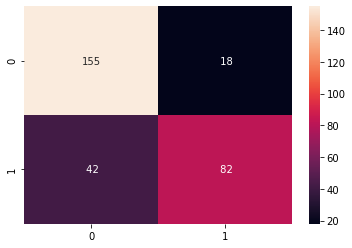

In [170]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True , fmt="3")

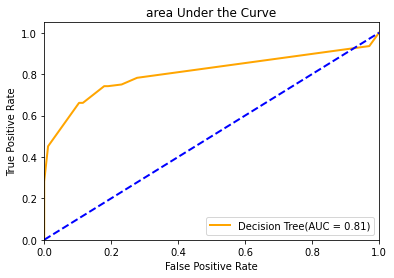

In [171]:
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [ ]:
####Random forest ###

In [172]:
#Assigning independent and dependent variables:

feature_space = titanic.iloc[:, titanic.columns != 'Survived']#independent
feature_class = titanic.iloc[:, titanic.columns == 'Survived']#target


training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 42)
#X_train,X_test,y_train,y_test

In [173]:
#import Random forest classifier and fit the data
from sklearn.ensemble import RandomForestClassifier 

In [174]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [175]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [176]:
#Providing random seed so that the same result is obtained everytime
np.random.seed(42)

# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(training_set, class_set)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None}


In [177]:
####extra
cv_rf.best_score_

0.8258607198748044

In [178]:
###extra
rf_best = cv_rf.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=None,
                       random_state=42)

In [179]:
rf_best.feature_importances_

array([2.02219688e-01, 2.48947474e-02, 1.05417902e-03, 8.57930121e-02,
       9.21110490e-02, 2.80111625e-01, 2.38426565e-01, 2.82213943e-03,
       0.00000000e+00, 7.33098880e-03, 0.00000000e+00, 6.87831751e-04,
       7.03240505e-03, 2.62614993e-04, 2.66502938e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.45881248e-02])

In [196]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(fit_rf, training_set, class_set, cv=10)
scores 

array([0.86111111, 0.77777778, 0.73239437, 0.97183099, 0.88732394,
       0.76056338, 0.8028169 , 0.81690141, 0.74647887, 0.90140845])

,Varname,Imp
5,Sex_female,0.280112
6,Sex_male,0.238427
0,Pclass,0.202220
4,Age_median,0.092111
3,Fare1,0.085793
18,Cabin_new_missing,0.054588
1,SibSp,0.024895
9,Embarked_S,0.007331
12,Cabin_new_C,0.007032
7,Embarked_C,0.002822


In [181]:
#Finally the best parameters are specifi
fit_rf.set_params(criterion = 'entropy',
                  max_features = None, 
                  bootstrap = True,
                  max_depth = 3)


RandomForestClassifier(criterion='entropy', max_depth=3, max_features=None,
                       random_state=42)

In [182]:
# Working on the OOB rate, OOB rate by default is 'FALSE'

fit_rf.set_params(oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)       #specifying the number of extimators or DTs
    fit_rf.fit(training_set, class_set)     #fit to the train dataset

    oob_error = 1 - fit_rf.oob_score_      #oob_score_ gives prediction score, subtract from 1 to find error
    error_rate[i] = oob_error
    
# The aim of this entire process is to check for how many Decision Trees does the OOB error rate comes least & is stable too!

In [183]:
error_rate

{15: 0.1853932584269663,
 16: 0.1896067415730337,
 17: 0.1896067415730337,
 18: 0.1867977528089888,
 19: 0.1853932584269663,
 20: 0.1853932584269663,
 21: 0.1882022471910112,
 22: 0.1896067415730337,
 23: 0.1910112359550562,
 24: 0.1910112359550562,
 25: 0.1839887640449438,
 26: 0.1839887640449438,
 27: 0.1797752808988764,
 28: 0.1811797752808989,
 29: 0.1797752808988764,
 30: 0.175561797752809,
 31: 0.1825842696629213,
 32: 0.1797752808988764,
 33: 0.1797752808988764,
 34: 0.1825842696629213,
 35: 0.1825842696629213,
 36: 0.1839887640449438,
 37: 0.1839887640449438,
 38: 0.1853932584269663,
 39: 0.1853932584269663,
 40: 0.1839887640449438,
 41: 0.1839887640449438,
 42: 0.1853932584269663,
 43: 0.1853932584269663,
 44: 0.1853932584269663,
 45: 0.1839887640449438,
 46: 0.1811797752808989,
 47: 0.1825842696629213,
 48: 0.1825842696629213,
 49: 0.1825842696629213,
 50: 0.1825842696629213,
 51: 0.1825842696629213,
 52: 0.1811797752808989,
 53: 0.1811797752808989,
 54: 0.1811797752808989,
 

In [184]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)
oob_series

15      0.185393
16      0.189607
17      0.189607
18      0.186798
19      0.185393
          ...   
996     0.172753
997     0.172753
998     0.172753
999     0.172753
1000    0.172753
Length: 986, dtype: float64

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes (From 15 to 1000 trees)')

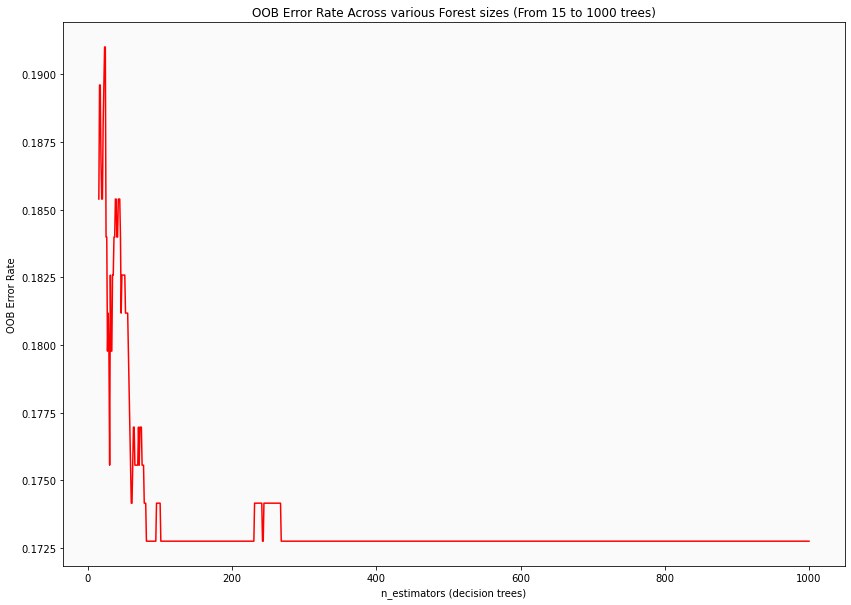

In [185]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
#plt.axhline(0.042, color='#875FDB',linestyle='--')
#plt.axhline(0.037, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators (decision trees)')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes (From 15 to 1000 trees)')

In [186]:
print('OOB Error rate for 110 trees is: {0:.5f}'.format(oob_series[110]))

OOB Error rate for 110 trees is: 0.17275


In [187]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=110,
                  bootstrap = True,
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=None,
                       n_estimators=110, random_state=42)

In [188]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=None,
                       n_estimators=110, random_state=42)

In [1]:
predictions_rf = fit_rf.predict(test_set)


NameError: name 'fit_rf' is not defined

In [190]:
confusion_matrix(test_class_set,predictions_rf)

array([[92, 13],
       [22, 52]], dtype=int64)

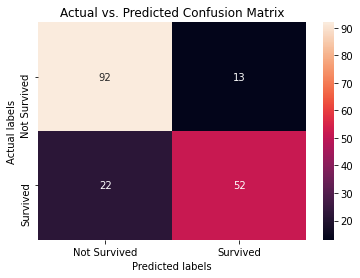

In [191]:
cm=confusion_matrix(test_class_set,predictions_rf)
ax= plt.subplot()
sns.heatmap(cm,annot=True, ax= ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Survived','Survived']); ax.yaxis.set_ticklabels(['Not Survived','Survived']);

plt.show()

In [192]:
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(test_class_set,predictions_rf)
accuracy_rf

0.8044692737430168

In [193]:
predictions_prob = fit_rf.predict_proba(test_set)[:, 1]   #y_pred_proba = log_reg.predict_proba(x_test)[::,1]

fpr2, tpr2, _ = roc_curve(test_class_set,
                          predictions_prob,
                          pos_label = 1)     #fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

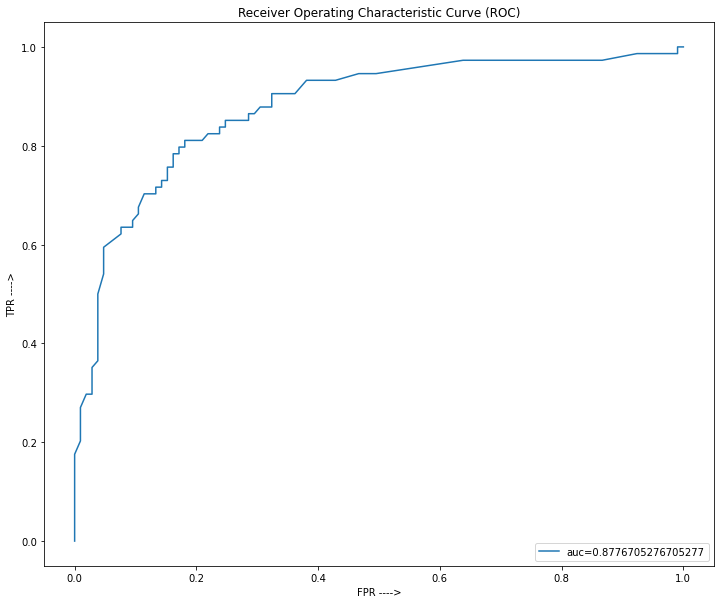

In [124]:
from sklearn import metrics
#metrics.roc_auc_score directly returns the auc for y_actual and corresponding prob values of success for each row
auc_rf = metrics.roc_auc_score(test_class_set, predictions_prob )

# Plotting the AUC curve
plt.figure(figsize=(12,10))
plt.plot(fpr2,tpr2,label="auc="+str(auc_rf))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [194]:
auc_rf

0.8776705276705277

In [197]:
##The accuracy of RF is higher than the Decision tree and LR.


In [198]:
####   KNN Algorithm  ###########
from sklearn.neighbors import KNeighborsClassifier

In [199]:
knn = KNeighborsClassifier(n_neighbors=3)    #Instantiate
knn.fit(X_train,y_train)                     #fit
pred = knn.predict(X_test)                   #Predict

In [200]:
#Predictions ans evaluations
print(confusion_matrix(y_test,pred))

[[144  29]
 [ 47  77]]


In [201]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       173
           1       0.73      0.62      0.67       124

    accuracy                           0.74       297
   macro avg       0.74      0.73      0.73       297
weighted avg       0.74      0.74      0.74       297



In [203]:
accuracy_rate = []
for i in range(1,40):    # May take some time
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,scaled_features,y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

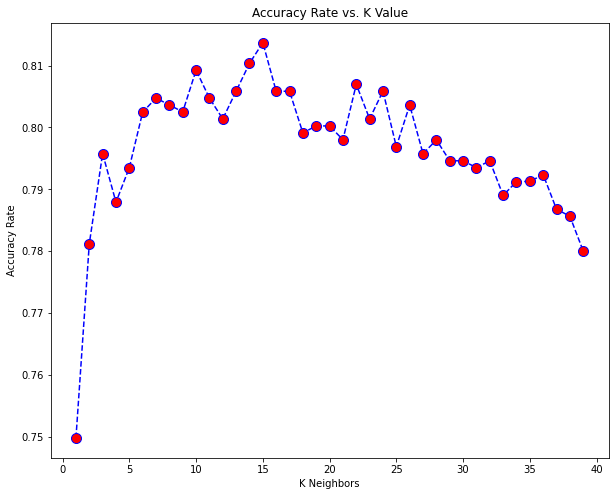

In [206]:
#Plotting the mean accuracy socre against all the K values

plt.figure(figsize = (10,8))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy Rate')

In [214]:
#Finally using the optimum value of K = 20

knn = KNeighborsClassifier(n_neighbors=20)    #Instantiate
knn.fit(X_train,y_train)                     #fit
pred = knn.predict(X_test)                   #Predict

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[157  16]
 [ 75  49]]
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       173
           1       0.75      0.40      0.52       124

    accuracy                           0.69       297
   macro avg       0.72      0.65      0.65       297
weighted avg       0.71      0.69      0.67       297



In [215]:
pred_prob = knn.predict_proba(X_test)[::, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          pred_prob)

auc(fpr2,tpr2)

0.7389054633600597

In [45]:
####comparing the models
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#import Random forest classifier and fit the data
from sklearn.ensemble import RandomForestClassifier 

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#Random forest
model3 = RandomForestClassifier(random_state=42)
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train,y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)


In [46]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [53]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print('AUC score for Logistic Regression is:' , auc_score3)
print('AUC score for KNN is:' , auc_score2)
print('AUC score for Random Forest is:' , auc_score3) 

AUC score for Logistic Regression is: 0.8401081484243893
AUC score for KNN is: 0.8031652060413947
AUC score for Random Forest is: 0.8401081484243893


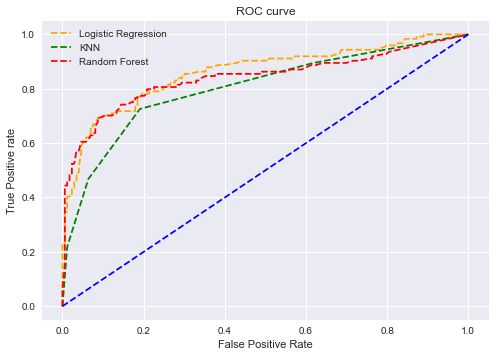

In [50]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();